O governo do canadá pediu a ajuda para nossa consultoria Sirius contruir uma IA que consiga fazer a predição da emissão de CO2 na atmosfera considerando algumas características dos carros. Portanto, com a construção dessa IA o governo conseguirá focar em questões relacionadas a melhoria da qualidade do ar.
Para a resolução deste exercício você precisará responder várias questões.



Aqui uma breve descrição de todas as variáveis disponíveis no dataset:

**Variáveis**
Tota de variáveis: 12

Lingua: Inglês

`Make:`	        Empresa que fez o veículo

`Model:`	        Modelo do carro. (4WD/4X4 = Tração nas quatro rodas, AWD = Tração nas quatro rodas, FFV = Veículo de combustível flexível, SWB = Distância entre eixos curta, LWB = Distância entre eixos longa, EWB = Distância entre eixos estendida)

`Vehicle Class: `  Classe do veiculo, dependendo da utilidade, capacidade e peso

`Engine Size(L):`  Tamanho do motor usado em litros.

`Cylinders:`      Número de cilindros

`Transmission:`   Tipo de transmissão com número de engrenagens. (A = Automático, AM = Manual automatizado, AS = Automático com mudança de seleção, AV = Variável continuamente, M = Manual e valores de 3 - 10 = Número das engrenagens.)

`Fuel Type:`           Tipo de combustível usado. (X = Gasolina normal, Z = Gasolina premium, D = Diesel, E = Etanol (E85), N = Gás natural)

`Fuel Consumption City (L/100 km):`           Consumo de combustível nas estradas da cidade (L / 100 km)

`Fuel Consumption Hwy (L/100 km):`            Consumo de combustível em rodovias (L / 100 km)

`Fuel Consumption Comb (L/100 km):`         O consumo de combustível combinado (55% cidade, 45% rodovia) é mostrado em L / 100 km

`Fuel Consumption Comb (mpg):`       O consumo de combustível combinado na cidade e na rodovia é mostrado em milhas por galão (mpg)

`CO2 Emissions(g/km): `    As emissões de dióxido de carbono do tubo de escape (em gramas por quilômetro) para condução combinada em cidade e rodovia


Ao longo desse exercícios vamos tentar responder a perguntas como:

1.   Quais variáveis mais impactam na emissão de CO2?
2.   Considerando os principais algoritmos de regressão, quais apresentam melhor resultado das métricas R2 e MSE?
O que você poderia fazer para melhorar os valores das métricas do melhor
1.   O que você poderia fazer para melhorar os valores das métricas do melhor algoritmo?

In [ ]:
#Questão 1
#Faça as importações necessárias


In [1]:
# Bibliotecas para manipulação e análise de dados
import pandas as pd
import numpy as np

# Bibliotecas para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas para pré-processamento de dados
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Bibliotecas para construção de modelos de regressão
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Bibliotecas para avaliação dos modelos
from sklearn.metrics import mean_squared_error, r2_score

# Configuração de visualização
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [ ]:
#Questão 2
#carregue os dados do arquivo csv


In [2]:
# Carregar os dados do arquivo CSV
data = pd.read_csv("CO2 Emissions_Canada.csv")

# Verificar as primeiras linhas do dataframe para ter uma noção dos dados
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
#Questão 3
#verifique as informações (info) do dataset e o seu formato (shape) e a sua descrição

In [3]:
# Informações gerais do dataset
print("Informações Gerais do Dataset:")
print("------------------------------")
data.info()

print("\n")  # apenas para separar os resultados

# Formato do dataset
print("Formato do Dataset:")
print("-------------------")
print(f"Total de Linhas: {data.shape[0]}")
print(f"Total de Colunas: {data.shape[1]}")

print("\n")  # apenas para separar os resultados

# Descrição estatística das colunas numéricas
print("Descrição Estatística:")
print("----------------------")
print(data.describe())

Informações Gerais do Dataset:
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emi

In [ ]:
#Questão 4
# Visualizando a disperção das variáveis em relação a emissão de CO2
#dica: use o pairplot para plotar todas de uma vez
#ax = sns.pairplot
#ax.fig.suptitle('Disperção entre as variaveis',y=1.05)


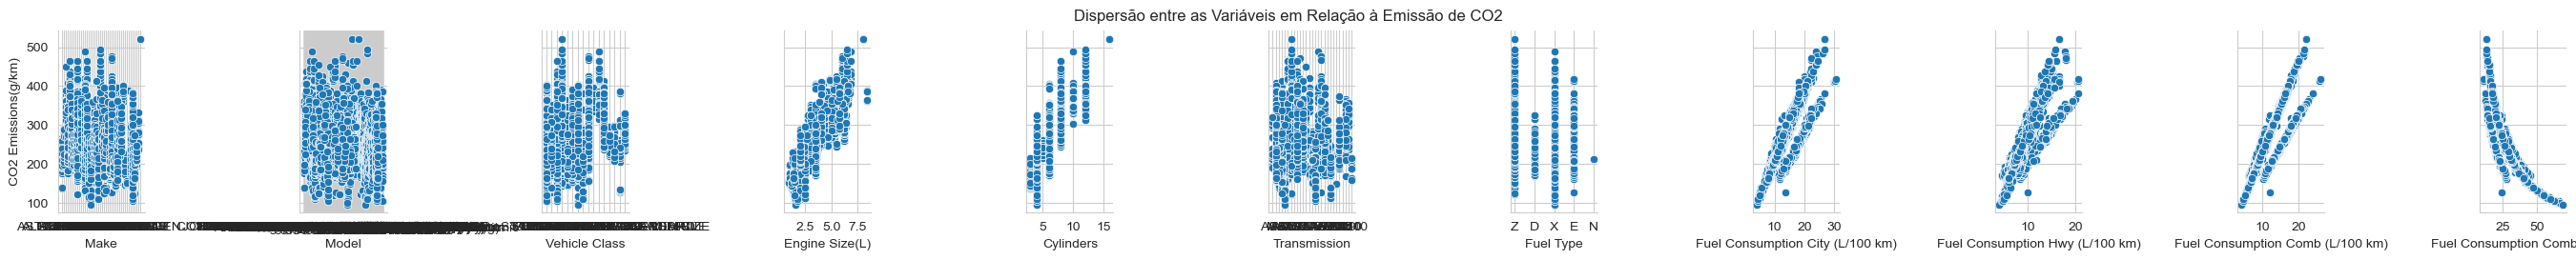

In [4]:
# Visualização da dispersão entre as variáveis usando pairplot
ax = sns.pairplot(data, y_vars="CO2 Emissions(g/km)", x_vars=data.columns.drop("CO2 Emissions(g/km)"))

# Adicionando título
ax.fig.suptitle('Dispersão entre as Variáveis em Relação à Emissão de CO2', y=1.05)

# Mostrar o gráfico
plt.show()

In [ ]:
#Questão 5
#Visualizando a distribuição da emissão de CO2
#dica: que tal usar um boxplot aqui?


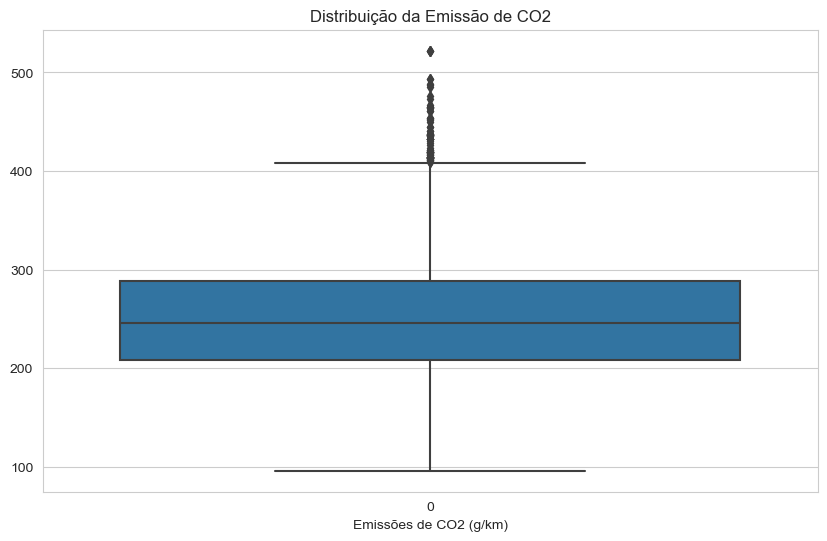

In [5]:
# Configuração do estilo do Seaborn
sns.set_style("whitegrid")

# Criando um boxplot para a emissão de CO2
plt.figure(figsize=(10, 6))
sns.boxplot(data["CO2 Emissions(g/km)"])

# Adicionando título e nomeando os eixos
plt.title('Distribuição da Emissão de CO2')
plt.xlabel('Emissões de CO2 (g/km)')

# Mostrando o gráfico
plt.show()

In [ ]:
#Questão 6
#visualize a correlação entre as variáveis
#dica: será que um heatmap pode ajudar a gente aqui?


C:\Users\99769242\AppData\Local\Temp\ipykernel_17924\3035180049.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


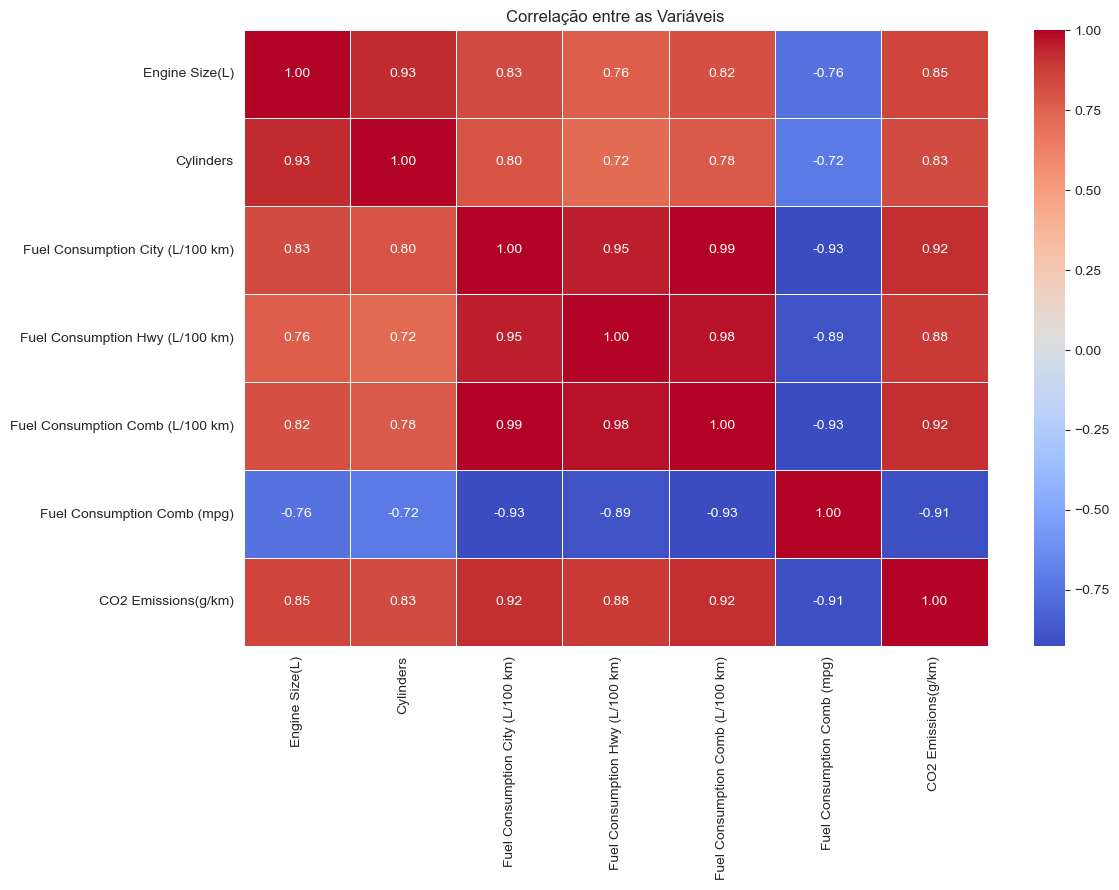

In [6]:
# Calculando a matriz de correlação
correlation_matrix = data.corr()

# Configurando o tamanho da figura
plt.figure(figsize=(12, 8))

# Criando um heatmap para a matriz de correlação
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Adicionando título
plt.title('Correlação entre as Variáveis')

# Mostrando o gráfico
plt.show()

In [ ]:
#Questão 7
#Transforme as variáveis categóricas em númericas usando o Pandas ou sckitlearn
#após a transformação, garanta que os novos valores estão no dataset (talvez você precise usar `copy` `concat` )
#não se esqueça de apagar as variáveis antigas `drop`
#você aqui pode querer rodar tudo duas vezes! Uma vez SEM as variáveis categóricas (apenas as remova do dataset) e a segunda vez transformando as variáveis categóricas
#qual versão irá se sair melhor? Porque você acha isso?

In [8]:
# Criando uma cópia do dataset original e removendo as variáveis categóricas
data_without_categorical = data.copy()
data_without_categorical.drop(['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type'], axis=1, inplace=True)

# Criando variáveis dummy (one-hot encoded) para as variáveis categóricas
dummies = pd.get_dummies(data[['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']], drop_first=True)

# Criando uma cópia do dataset original, removendo as variáveis categóricas originais e adicionando as novas variáveis dummy
data_with_dummies = pd.concat([data.drop(['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type'], axis=1), dummies], axis=1)

In [ ]:
#Questão 8
#Defina X e y e separa 20% dos dados para test

In [10]:
from sklearn.model_selection import train_test_split

# Definindo X e y
X = data_with_dummies.drop("CO2 Emissions(g/km)", axis=1)
y = data["CO2 Emissions(g/km)"]

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
#Questão 9
#Antes de começarmos a treinar nossos modelos, que tal criar uma funcão que recebe 2 parâmetros: o valor previsto pelo modelo e o resultado real.
#Com base nesse 2 valores, a funcão calcula e imprime o R2, MSE e MAE

In [16]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def evaluate_model(predictions, actual):
    r2 = r2_score(actual, predictions)
    mse = mean_squared_error(actual, predictions)
    mae = mean_absolute_error(actual, predictions)
    
    print("R2 (Coeficiente de Determinação):", r2)
    print("MSE (Erro Quadrático Médio):", mse)
    print("MAE (Erro Absoluto Médio):", mae)

In [13]:
#Quais variáveis tem mais importância pro nosso modelo?
#vamos usar o código abaixo para criar uma função que exiba as 10 variáveis que tem mais peso na predição do modelo
#Você consegue entender o que essa função está fazendo?
def feature_importance(modelo):
    importances = pd.Series(data=modelo.feature_importances_, index=df_copia.drop(columns=['CO2 Emissions(g/km)']).columns)
    importances.sort_values(ascending=False, inplace=True) #ordenando as variáveis
    sns.barplot(x=importances[:10], y=importances.index[:10], orient='h').set_title('Importância de cada feature')


In [ ]:
#Escolha um modelo de regressão de sua preferência mais o Decision Tree, Random Forest e o XGBoost para treinar e testar.
#Para os 3 últimos (DT, RF e  XGB) calcule quais as features mais importantes usando a função que acabamos de criar
#Para cada um deles responda:
#1- Como foram as métricas de avaliação do modelo?
#2- Para os 3 últimos, responda: Quais features foram as mais importantes para o modelo?

In [ ]:
#Questão 10 - Modelo 1 - a sua escolha

In [17]:
from sklearn.linear_model import LinearRegression

# Treinando o modelo
lr = LinearRegression()
lr.fit(X_train, y_train)

# Previsões
predictions_lr = lr.predict(X_test)

# Avaliando o modelo
print("Avaliação da Regressão Linear:")
evaluate_model(predictions_lr, y_test)

Avaliação da Regressão Linear:
R2 (Coeficiente de Determinação): -4281039765892458.5
MSE (Erro Quadrático Médio): 1.4725181741472074e+19
MAE (Erro Absoluto Médio): 686966879.1957244


In [ ]:
#Questão 11 - Modelo 2 - Decision Tree

In [22]:
from sklearn.tree import DecisionTreeRegressor

# Treinando o modelo
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Previsões
predictions_dt = dt.predict(X_test)

# Avaliando o modelo
print("\nAvaliação da Decision Tree:")
evaluate_model(predictions_dt, y_test)

# Features mais importantes
important_features_dt = pd.Series(dt.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeatures mais importantes para Decision Tree:")
print(important_features_dt.head(10))


Avaliação da Decision Tree:
R2 (Coeficiente de Determinação): 0.9925157695728051
MSE (Erro Quadrático Médio): 25.742964154066048
MAE (Erro Absoluto Médio): 2.2011171293161818

Features mais importantes para Decision Tree:
Fuel Consumption Comb (L/100 km)         0.914936
Fuel Type_E                              0.055128
Fuel Consumption Comb (mpg)              0.019618
Fuel Consumption Hwy (L/100 km)          0.002271
Vehicle Class_PICKUP TRUCK - STANDARD    0.001189
Fuel Consumption City (L/100 km)         0.000982
Fuel Type_X                              0.000901
Vehicle Class_PICKUP TRUCK - SMALL       0.000693
Model_GL 350 BLUETEC 4MATIC              0.000339
Engine Size(L)                           0.000261
dtype: float64


In [ ]:
#Questão 12 - Modelo 3 - Random Forest

In [23]:
from sklearn.ensemble import RandomForestRegressor

# Treinando o modelo
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Previsões
predictions_rf = rf.predict(X_test)

# Avaliando o modelo
print("\nAvaliação do Random Forest:")
evaluate_model(predictions_rf, y_test)

# Features mais importantes
important_features_rf = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeatures mais importantes para Random Forest:")
print(important_features_rf.head(10))


Avaliação do Random Forest:
R2 (Coeficiente de Determinação): 0.9936855988550253
MSE (Erro Quadrático Médio): 21.71918728461727
MAE (Erro Absoluto Médio): 2.212496640893898

Features mais importantes para Random Forest:
Fuel Consumption Comb (L/100 km)         0.791868
Fuel Consumption Comb (mpg)              0.129085
Fuel Type_E                              0.047053
Fuel Consumption City (L/100 km)         0.011200
Engine Size(L)                           0.009590
Cylinders                                0.002058
Model_FOCUS FFV                          0.001272
Fuel Consumption Hwy (L/100 km)          0.001150
Vehicle Class_PICKUP TRUCK - STANDARD    0.000917
Vehicle Class_PICKUP TRUCK - SMALL       0.000725
dtype: float64


In [ ]:
#Questão 13 - XGBoost

In [26]:
import xgboost as xgb

# Treinando o modelo
xg_model = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)
xg_model.fit(X_train, y_train)

# Previsões
predictions_xgb = xg_model.predict(X_test)

# Avaliando o modelo
print("\nAvaliação do XGBoost:")
evaluate_model(predictions_xgb, y_test)

# Features mais importantes
important_features_xgb = pd.Series(xg_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeatures mais importantes para XGBoost:")
print(important_features_xgb.head(10))


Avaliação do XGBoost:
R2 (Coeficiente de Determinação): 0.9938438995476803
MSE (Erro Quadrático Médio): 21.174691882421524
MAE (Erro Absoluto Médio): 2.505254374861152

Features mais importantes para XGBoost:
Fuel Consumption Comb (L/100 km)         0.679325
Fuel Type_E                              0.151618
Model_GLA 250 4MATIC                     0.016617
Model_FOCUS FFV                          0.015516
Engine Size(L)                           0.014021
Vehicle Class_PICKUP TRUCK - SMALL       0.012262
Fuel Type_X                              0.009236
Fuel Consumption City (L/100 km)         0.008857
Vehicle Class_PICKUP TRUCK - STANDARD    0.006567
Fuel Consumption Hwy (L/100 km)          0.006512
dtype: float32


In [ ]:
#Questão 14
#Você consegue alterar os parâmetros do XGBoost para que ele alcance um resultado melhor?

In [27]:
from sklearn.model_selection import GridSearchCV

# Parâmetros a serem testados
param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.9],
    'colsample_bytree': [0.7, 0.9],
    'n_estimators': [100, 500],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1, 1.5]
}

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Usando GridSearchCV
grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Melhores parâmetros
print("Melhores parâmetros encontrados: ", grid_search.best_params_)

# Avaliação usando os melhores parâmetros
best_xgb = grid_search.best_estimator_
predictions_best_xgb = best_xgb.predict(X_test)
print("Avaliação do XGBoost com melhores parâmetros:")
evaluate_model(predictions_best_xgb, y_test)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits
Melhores parâmetros encontrados:  {'colsample_bytree': 0.9, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 500, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.7}
Avaliação do XGBoost com melhores parâmetros:
R2 (Coeficiente de Determinação): 0.9954052666910866
MSE (Erro Quadrático Médio): 15.804170651808997
MAE (Erro Absoluto Médio): 2.156092086513057


In [29]:
# Treinando o modelo
xg_best = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, colsample_bytree=0.9, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.7)
xg_best.fit(X_train, y_train)

# Previsões
predictions_xgb_best = xg_best.predict(X_test)

# Avaliando o modelo
print("\nAvaliação do XGBoost:")
evaluate_model(predictions_xgb_best, y_test)

# Features mais importantes
important_features_xgb = pd.Series(xg_best.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeatures mais importantes para XGBoost:")
print(important_features_xgb.head(10))


Avaliação do XGBoost:
R2 (Coeficiente de Determinação): 0.9954052666910866
MSE (Erro Quadrático Médio): 15.804170651808997
MAE (Erro Absoluto Médio): 2.156092086513057

Features mais importantes para XGBoost:
Fuel Consumption Comb (L/100 km)         0.644618
Fuel Type_E                              0.154879
Model_GLA 250 4MATIC                     0.016024
Model_FOCUS FFV                          0.012260
Vehicle Class_PICKUP TRUCK - SMALL       0.008553
Vehicle Class_PICKUP TRUCK - STANDARD    0.008230
Engine Size(L)                           0.008001
Fuel Type_Z                              0.007051
Model_ESCALADE ESV AWD                   0.006823
Fuel Type_X                              0.006227
dtype: float32
